# IMPORTACION DE LIBRERIAS NECESARIAS


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mcolors

# LECTURA DE DATOS


In [12]:
data = pd.read_excel(r'C:\Users\santi\Desktop\BD_URGENCIAS_BIO.xlsx')
data.head()

,COD,DESCRIPCION,Año,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,1102,URGENCIAS ADULTO,2023,ENERO,CC,8597130640,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,1102,URGENCIAS ADULTO,2023,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,1102,URGENCIAS ADULTO,2023,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,1102,URGENCIAS ADULTO,2023,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,1102,URGENCIAS ADULTO,2023,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39745 entries, 0 to 39744
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   COD                                    39745 non-null  int64  
 1   DESCRIPCION                            39745 non-null  object 
 2   Año                                    39745 non-null  int64  
 3   Mes                                    39745 non-null  object 
 4   Paciente Tipo Identificacion           39745 non-null  object 
 5   Nro Atencion                           39745 non-null  int64  
 6   Servicio Admite                        39745 non-null  object 
 7   Servicio Anterior                      32226 non-null  object 
 8   Servicio Egreso                        39745 non-null  object 
 9   Tipo Egreso (INTERNACION)              39745 non-null  object 
 10  Paciente Entidad Responsable Pago      39745 non-null  int64  
 11  Pa

## Variables númericas

In [14]:
data.describe()

,COD,Año,Nro Atencion,Paciente Entidad Responsable Pago,Dias (Camara - F3),Horas (Camara - F3),Minutos (Camara - F3),Urg Demora1 Consulta (Minutos),Dias (Camara - Triaje),Horas (Camara - Triaje),...,Dias,Horas,Minutos,Tiempo Egreso Urgencias,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total
count,39745.0,39745.0,3.974500e+04,39745.000000,39744.0,39744.000000,39745.000000,39745.000000,39745.0,39745.000000,...,39744.000000,39744.000000,39744.000000,28820.000000,21097.000000,18100.000000,22509.000000,17261.000000,25201.000000,39745.000000
mean,1102.0,2023.0,1.345857e+11,38.846396,0.0,0.042736,61.537700,43.183693,0.0,0.005150,...,0.084667,2.180379,114.700081,1032.735427,709.835664,989.108950,342.348483,596.990267,1067.947066,1130.303309
std,0.0,0.0,7.955160e+10,21.252590,0.0,0.058331,83.997075,76.696936,0.0,0.006997,...,1.148883,27.065652,1547.257898,1750.003457,2426.267218,2779.918034,853.176379,2205.600704,3179.767137,2933.000766
min,1102.0,2023.0,1.234032e+07,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,-18.000000,-1038.000000,-31963.000000,-124.000000,0.000000,-1362.000000,-5496.000000,0.000000,-5496.000000
25%,1102.0,2023.0,6.537377e+10,18.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,23.000000,153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,114.000000
50%,1102.0,2023.0,1.329287e+11,48.000000,0.0,0.032068,46.166667,19.133333,0.0,0.002847,...,0.000000,1.000000,51.000000,438.000000,6.000000,0.000000,142.000000,0.000000,176.000000,304.000000
75%,1102.0,2023.0,2.029542e+11,48.000000,0.0,0.054758,78.850000,48.850000,0.0,0.007581,...,0.000000,2.000000,100.000000,1264.000000,45.000000,423.000000,405.000000,10.000000,438.000000,674.000000
max,1102.0,2023.0,2.755966e+11,74.000000,0.0,0.748102,1077.266667,1047.266667,0.0,0.154021,...,148.000000,3556.000000,213364.000000,45725.000000,38413.000000,143089.000000,32144.000000,38104.000000,43222.000000,43222.000000


## Variables categoricas

In [15]:
data.describe(include=[object,bool])

,DESCRIPCION,Mes,Paciente Tipo Identificacion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),...,Ubicacion Urgencias,Causa Externa (Riesgo),Modalidad Atencion,Ubicación Triaje,Tiempo Duracion Diligenciamiento F3,Triaje Re-clasificado,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
count,39745,39745,39745,39745,32226,39745,39745,39745,39739,39745,...,39737,39745,39737,39745,30180,39745,39745,39742,39736,39725
unique,2,12,11,10,53,46,6,3,4,39724,...,5,9,3,13,2998,2,2,6,6,11
top,URGENCIAS ADULTO,ABRIL,CC,URGENCIAS GENERALES SÓTANO,NO APLICA,NO APLICA,ALTA MÉDICA,EVENTO,CONTRIBUTIVO,15/06/2023 5:54:12,...,OBSERVACION,ENFERMEDAD GENERAL,URGENCIAS,CONSULTORIO 1,0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
freq,31903,4022,31057,18977,16320,16320,20348,33740,16424,2,...,21754,35696,31864,12774,3876,30241,24961,21070,37148,37916


# Análisis de características innecesarias o poco descriptivas

In [16]:
columnas_valores_unicos = {columna: data[columna].nunique() for columna in data.columns}

columnas_ordenadas = sorted(columnas_valores_unicos.items(), key=lambda x: x[1])

variables_un_valor = []
for columna, num_valores_unicos in columnas_ordenadas:
    if num_valores_unicos == 1:
        variables_un_valor.append(columna)

# Eliminamos las variables que tienen un solo valor
data.drop(columns=variables_un_valor, inplace=True)

# Eliminamos el número de atención puesto que no es una variable explicativa
# Eliminamos la variable del tipo de identificación puesto que no es una varibale explicativa
# Eliminamos la variable de grupo de edad ya que ya esta explicada en la edad del paciente
# Eliminamos la variable Profesional Indentificación puesto que no es una variable explicativa
# Eliminamos la variable de Dx Principal puesto que esta repetida en la variable Dx Principal Cod
# Eliminamos la variable de Dx Principal Capitulo puesto que esta repetida en la variable Dx Principal Capitulo Cod
# Eliminamos la variable de Dx Principal.1 puesto que esta repetida en la variable Dx Principal.1 Cod
# Eliminamos la variable de Dx Relacionado1 puesto que esta repetida en la variable Dx Relacionado1 Cod
# Eliminamos la variable de Dx Relacionado2 puesto que esta repetida en la variable Dx Relacionado2 Cod
# Eliminamos la variable de Dx Relacionado3 puesto que esta repetida en la variable Dx Relacionado3 Cod
# Eliminamos la variable de Dx Principal Capitulo Cod puesto que es igual a la variable Dx Principal Cod sin el ultimo valor del código
# Eliminamos la variable Horas (Camara - F3) debido a que no es congruente con la resta entre las fechas de Camara y F3
# Las fechas de Camara y F3 no son congruentes debido a que a a veces la fecha de camara es mayor que la de F3 
# Eliminamos la variable Dias (Triaje - F3) debido a que el 99% de los valores es 0 y el restante es -1

# Quitamos la variable unidad y convertimos los mesesy dias a unidades de años
data['Paciente Edad'] = data['Paciente Edad'].astype(float)
data.loc[data['Unidad'] == 'Meses', 'Paciente Edad'] /= 12
data.loc[data['Unidad'] == 'Días', 'Paciente Edad'] /= 365


data.drop(columns=['Nro Atencion',
                    'Paciente Tipo Identificacion',
                    'Grupo Edad',
                    'Profesional Identificacion',
                    'Dx Principal',
                    'Dx Principal Capitulo\n',
                    'Dx Principal.1',
                    'Dx Relacionado1\n',
                    'Dx Relacionado2\n',
                    'Dx Relacionado3\n',
                    'Unidad',
                    'Dx Principal Capitulo Cod',
                    'Horas (Camara - F3)',
                    'Dias (Triaje - F3)'],
            inplace=True)

data

,DESCRIPCION,Mes,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,URGENCIAS ADULTO,ENERO,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,48,EVENTO,SUBSIDIADO,2023-01-15 20:15:31.733000,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,URGENCIAS ADULTO,ENERO,NO APLICA,NO APLICA,NO APLICA,NO APLICA,5,PGP,SUBSIDIADO,2023-01-01 14:14:06.223000,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,NO APLICA,NO APLICA,NO APLICA,NO APLICA,65,EVENTO,ESPECIAL,2023-01-07 18:21:27.977000,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,48,EVENTO,CONTRIBUTIVO,2023-01-11 11:19:16.737000,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,19,EVENTO,CONTRIBUTIVO,2023-01-07 10:08:49.397000,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39740,URGENCIAS ADULTO,DICIEMBRE,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 4 URGENCIAS,PISO 2 OCCIDENTE,ALTA MÉDICA,4,EVENTO,SUBSIDIADO,17/12/2023 2:06:21,...,70.0,3459.0,0.0,162.0,0.0,162,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,NO ASEGURADO,25/12/2023 9:16:35,...,0.0,0.0,0.0,0.0,133.0,133,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,NO APLICA,NO APLICA,NO APLICA,18,EVENTO,NO ASEGURADO,29/12/2023 11:20:02,...,0.0,0.0,0.0,0.0,100.0,100,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39743,URGENCIAS ADULTO,DICIEMBRE,URGENCIAS GENERALES SÓTANO,NaN,CAMILLAS SALA 3 URGENCIAS,REMISIÓN A OTRA INSTITUCIÓN,65,EVENTO,ESPECIAL,28/12/2023 8:35:43,...,0.0,0.0,838.0,0.0,0.0,838,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


# Análisis estadistico

## Mes

In [17]:
data['Mes'].value_counts()

Mes
ABRIL         4022
MARZO         4021
MAYO          3850
AGOSTO        3624
JUNIO         3564
JULIO         3542
FEBRERO       3027
SEPTIEMBRE    2872
DICIEMBRE     2855
OCTUBRE       2811
ENERO         2810
NOVIEMBRE     2747
Name: count, dtype: int64

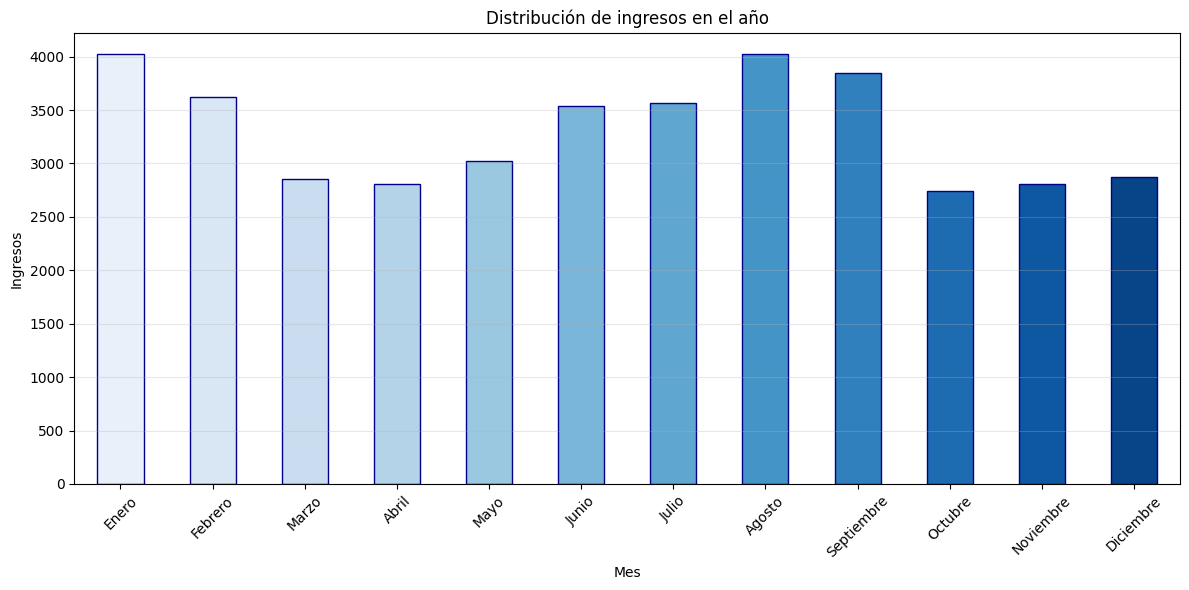

In [18]:
month_counts = data['Mes'].value_counts().sort_index()
months_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
max_count = month_counts.max()
color_palette = sns.color_palette('Blues', n_colors=len(month_counts))

# Plot histogram
plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar', color=color_palette, edgecolor='darkblue',zorder=0) 

# Customize plot
plt.title('Distribución de ingresos en el año')
plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


plt.xticks(range(len(months_order)), months_order, rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## Diagnostico

In [21]:
diagnosticos_total = pd.concat([data['Dx Principal Cod'], 
                          data['Dx Relacionado1 Cod'], 
                          data['Dx Relacionado2 Cod '],
                          data['Dx Relacionado3 Cod']])

frecuencia_diagnosticos = diagnosticos_total.value_counts()
value_counts = frecuencia_diagnosticos.reset_index()
value_counts.columns = ['Category', 'Count']

total_count = value_counts['Count'].sum()
value_counts['Percentage'] = round((value_counts['Count'] / total_count) * 100, 2)

fig = px.treemap(value_counts, path=['Category'],
                values='Count', 
                hover_data={'Category': True, 'Count': True, 'Percentage': True},
                labels={'Percentage': 'Percentage (%)'})
fig.update_layout(title='Resumen de diagnosticos')
fig.show()

## Edad

In [97]:
fig = px.histogram(data, x='Paciente Edad', nbins=100, histfunc='count', 
                   #marginal='rug', # Show individual data points on the margin
                   opacity=0.75, # Adjust the opacity for better visualization
                   template="plotly", # Dark theme for a more stylish look
                   title='Distribucion de edades',
                   #color_discrete_sequence=['#4191c6'],
                   color='Clasificacion 1 Triaje \nEnfermeria '
                   ) 

fig.update_traces(hovertemplate='Edad: %{x}<br>Pacientes: %{y}')
# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='# de pacientes',
    showlegend=True, # No legend for simplicity
    barmode='overlay', # Overlay the histograms
    bargap=0.1, # Adjust the gap between bars
)

# Show the plot
fig.show()
